In [ ]:
# Task-2:-  Apply convolution neural networks (CNN)
# •	Apply CNN and find the model accuracy with (80-20 train-test split) on the MNIST dataset.
# o	Results should be obtained on following parameters-
# 	Accuracy
# 	Precision (Positive Predictive Value)
# 	Recall (Sensitivity)
# 	F-Measure
# 	Confusion Matrix
# 	ROC
# 	AUC
# •	Apply CNN and find the model accuracy with (80-20 train-test split) on the CIFAR-10 dataset.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:

def pooling_layer(pool_type='max', pool_size=(2, 2)):
    if pool_type == 'max':
        return layers.MaxPooling2D(pool_size)
    elif pool_type == 'avg':
        return layers.AveragePooling2D(pool_size)

In [ ]:


# Build CNN model for MNIST
model_mnist = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    pooling_layer('max'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    pooling_layer("max"),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mnist.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluate on test data
mnist_loss, mnist_acc = model_mnist.evaluate(x_test, y_test)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - accuracy: 0.8717 - loss: 0.4030 - val_accuracy: 0.9824 - val_loss: 0.0585
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9827 - loss: 0.0549 - val_accuracy: 0.9855 - val_loss: 0.0526
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9890 - loss: 0.0340 - val_accuracy: 0.9838 - val_loss: 0.0590
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9887 - val_loss: 0.0379
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9949 - loss: 0.0150 - val_accuracy: 0.9848 - val_loss: 0.0560
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9888 - val_loss: 0.0429
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9959 -

In [ ]:
model_mnist.save("model_mnist.keras")

In [ ]:

# Predictions
y_pred_mnist = np.argmax(model_mnist.predict(x_test), axis=1)

# Classification report
print("\nMNIST Classification Report:\n", classification_report(y_test, y_pred_mnist))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

MNIST Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



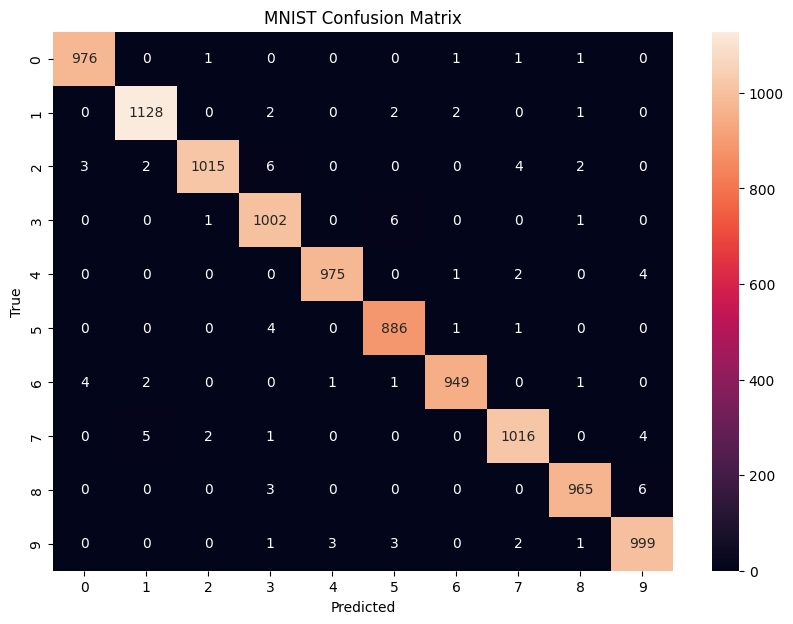

In [ ]:
# Confusion matrix
cm_mnist = confusion_matrix(y_test, y_pred_mnist)
plt.figure(figsize=(10,7))
sns.heatmap(cm_mnist, annot=True, fmt='d')
plt.title('MNIST Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




In [ ]:
# Lab- 5
# CSET340- Advanced Computer Vision and Video analytics
# Task-1:-  Perform image compression operation on an image.
# Image compression reduces the size of image files while maintaining acceptable quality. The most common techniques include:
# 1. Lossless Compression- PNG (Portable Network Graphics), GIF (Graphics Interchange Format), TIFF (Tagged Image File Format), Run-Length Encoding (RLE), Huffman Coding, Lempel-Ziv-Welch (LZW).
# 2. Lossy Compression-JPEG (Joint Photographic Experts Group), WebP (Google's Image Format), Discrete Cosine Transform (DCT), Wavelet Transform (JPEG 2000), Principal Component Analysis (PCA) Based Compression
# •	T 1.1:- Perform image compression using a lossy method like JPEG.
# •	T 1.2:- Perform image compression using a lossy method like PNG.

In [ ]:
from PIL import Image
import os

# Load the image
image_path = 'sample.jpg'
image = Image.open(image_path)

# T 1.1: Perform JPEG Compression (Lossy)
jpeg_path = 'compressed_image.jpeg'
image.save(jpeg_path, 'JPEG', quality=50)  # Adjust quality (1-100)

print(f'JPEG Compressed image saved at: {jpeg_path}')

# T 1.2: Perform PNG Compression (Lossless)
png_path = 'compressed_image.png'
image.save(png_path, 'PNG', optimize=True)

print(f'PNG Compressed image saved at: {png_path}')

JPEG Compressed image saved at: compressed_image.jpeg
PNG Compressed image saved at: compressed_image.png


In [ ]:
import cv2

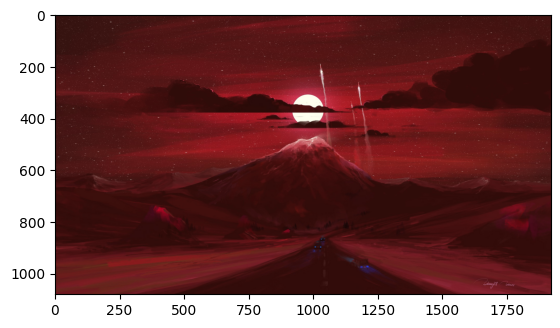

In [ ]:
plt.imshow(cv2.imread('/content/sample.jpg'))

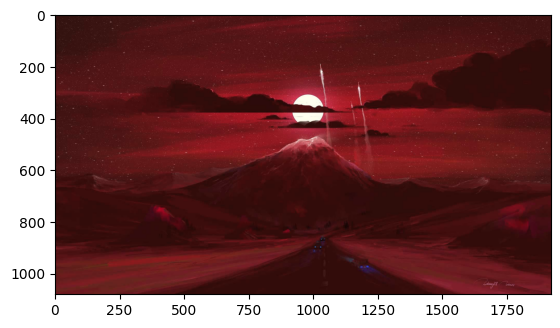

In [ ]:
# cv2.imread('/content/compressed_image.jpeg')
plt.imshow(cv2.imread('/content/compressed_image.jpeg'))